### linear Regression
Dataset:seaborn.tips
Model:Simple linear regression 

### 1.Data Collection

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
df=sns.load_dataset('tips')
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### 2.Understanding the data set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### 3.stats of data set

In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 4.Relationship check
before using any model we must confirm this step??

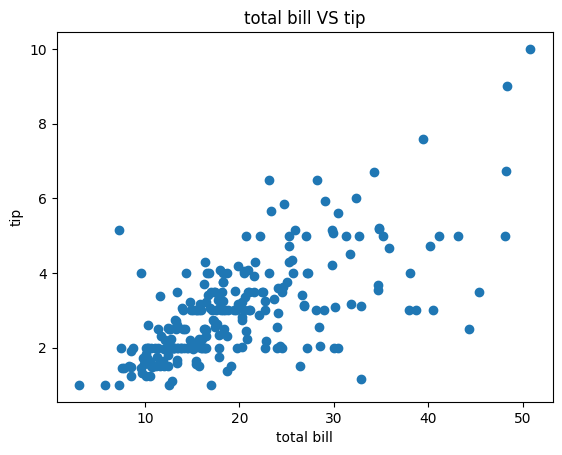

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['total_bill'],df['tip'])
plt.xlabel('total bill')
plt.ylabel('tip')
plt.title('total bill VS tip')
plt.show()


#observation
#1.As the bill increase tip increase
#2.Relation = Straight line(we can use linear regression)

### 4.Feature and Target Separation

In [ ]:
x=df[['total_bill']]#feature i/p should in 2D (imp)
y=df['tip']#feature i/p should in 1D

### 5.Train-Test Split

used for model to perform well on unseen data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#80%-->training
#20%-->testing

### 6.Feature standardization

compare the co-efficients fairly
avoid dominance of large values
prepare for ridge / Lasso

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

#imp
#1.fit only on training data
#2.prevents the data leakage


### 8.train linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)


print('co-efficent (m) :',model.coef_[0],'\nIntercept (c) :',model.intercept_)

co-efficent (m) : 0.9357171400271826 
Intercept (c) : 3.0877948717948724


In [ ]:
y_pred=model.predict(x_test_scaled)

### 8.Model Evaluation

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('R2 Score : ' ,r2)

R2 Score :  0.5449381659234664


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('MSE :',mse)
print("RSME  :",rmse)

MSE : 0.5688142529229538
RSME  : 0.7541977545199626


### 9.Visualize the Best fit line

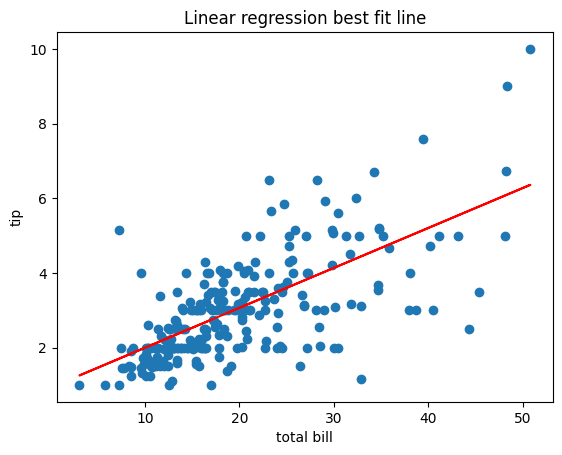

In [ ]:
plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color='red')
plt.xlabel('total bill')
plt.ylabel('tip')
plt.title('Linear regression best fit line')
plt.show()

In [ ]:
bill_amt=float(input('enter bill amt = '))
bill_scaled=scaler.transform([[bill_amt]])
predict_tip=model.predict(bill_scaled)

print(f'predicted tip : ${predict_tip[0]:.2f}')